In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
df.info()
#all non empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# len(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X = df.drop(columns = 'Outcome')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# scaler = preprocessing.StandardScaler().fit(X)
# scaler

In [ ]:
# scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25


# Using Standard Scaler and SVC

In [ ]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=0.8))

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=0.8))])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = pipe.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7755905511811023


In [ ]:
#accuracy = 77.56% (default)
#           78.74% (kernel = 'linear', C=1)

# Using MinMaxScaler and SVC

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
clf = make_pipeline( MinMaxScaler(), SVC())

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [ ]:
predict = clf.predict(X_test)
print(accuracy_score(y_test,predict))

0.7716535433070866


In [ ]:
#accuracy = 77.16%

# Using Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classf = RandomForestClassifier( random_state = 0)
classf.fit(X_train, y_train)
predictions=classf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8031496062992126


In [ ]:
#Forest classifier accuracy = 80.314%

# Using correlations

In [ ]:
correlation_find = X.drop(columns = ['Age', 'Pregnancies'])
correlation_find.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,148,72,35,0,33.6,0.627
1,85,66,29,0,26.6,0.351
2,183,64,0,0,23.3,0.672
3,89,66,23,94,28.1,0.167
4,137,40,35,168,43.1,2.288


Text(0.5, 1.0, 'Correlation')

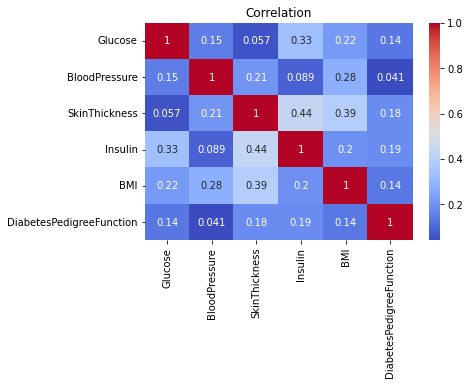

In [ ]:
sns.heatmap(correlation_find.corr(), annot=True, cmap='coolwarm').set_title('Correlation')

**No High correlations found**